<a href="https://colab.research.google.com/github/ramazan0v/3253-Machine-Learning/blob/main/Machine_Learning_group11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GROUP 11 - Target Marketing for Canadian Customers 

# Attribute Information

customer_id - an anonymous id unique to a given customer 

Balance : - Current + Savings Account Balance

PreviousCampaignResult - Last Campaign Results

Product1...Product6 - List of different products owned by the customer

Transaction1...Transaction9 - Last 9 transactions made by the customer

External Accounts 1...External Accounts 7 - External accounts held by the customer, including bills

Activity Indicator - Number of activities done the customer, including telebanking, going to the bank

Regular Interaction Indicator - How frequent the customer is interacting with the bank (Rating Scale)

CompetitiveRate1 ... CompetitiveRate7 - Interest rates offered to the customer

RateBefore - Interest rates on the products, customer have before the competitive rates being offered

ReferenceRate -Interest rates on the products, the customer have after the negotiations made to the competitive rates being offered

In [ ]:
#importing libraries

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;

import numpy as np
#from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Import Dataset

Importing data:

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['train.csv']), index_col="Customer_id")
# Dataset is now stored in a Pandas Dataframe

Saving train.csv to train.csv


# Data Description and Exploration

In [ ]:
data.shape

(63999, 36)

In [ ]:
data.info() #no missing values, and all the attributes are numerical data types. 

<class 'pandas.core.frame.DataFrame'>
Index: 63999 entries, CTSP000001 to CTSP063999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Target                       63999 non-null  int64  
 1   Balance                      63999 non-null  float64
 2   PreviousCampaignResult       63999 non-null  int64  
 3   Product1                     63999 non-null  int64  
 4   Product2                     63999 non-null  int64  
 5   Product3                     63999 non-null  int64  
 6   Product4                     63999 non-null  int64  
 7   Product5                     63999 non-null  int64  
 8   Product6                     63999 non-null  int64  
 9   Transaction1                 63999 non-null  float64
 10  Transaction2                 63999 non-null  float64
 11  Transaction3                 63999 non-null  float64
 12  Transaction4                 63999 non-null  float64
 13  Transac

In [ ]:
data.describe()

,Target,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,Transaction1,Transaction2,Transaction3,Transaction4,Transaction5,Transaction6,Transaction7,Transaction8,Transaction9,ExternalAccount1,ExternalAccount2,ExternalAccount3,ExternalAccount4,ExternalAccount5,ExternalAccount6,ExternalAccount7,ActivityIndicator,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
count,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,6.399900e+04,6.399900e+04,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000,63999.000000
mean,0.499773,22697.014218,0.001484,0.200441,0.160456,0.001766,0.092158,0.022125,0.041876,312.852441,98.306560,972.439108,13346.706243,5.872490e+03,8.831981e+03,101.191833,1522.355254,1123.682674,0.197034,0.301911,0.082533,0.123783,0.191862,0.100423,0.019313,19.776778,0.595291,1.379736,1.836435,1.391770,1.757322,1.882755,1.678434,1.412233,1.678434,1.315226
std,0.500004,10819.489043,0.039303,0.400333,0.367031,0.041983,0.289251,0.147092,0.200307,4932.061568,897.296635,5903.126316,25046.228309,2.226038e+04,3.051680e+04,894.873343,7410.544303,9570.708952,0.397762,0.459090,0.275176,0.329337,0.393768,0.300566,0.137623,104.827436,1.162643,0.206340,0.370122,0.161833,0.357483,0.516006,0.160600,0.575083,0.160600,0.106634
min,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.340000,-33813.000000,0.000000e+00,-2.092436e+04,-957.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.025000,1.425000,1.125000,1.425000,1.175000,1.425000,0.525000,1.425000,1.125000
25%,0.000000,13499.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.425000,1.575000,1.425000,1.575000,1.575000,1.675000,0.525000,1.675000,1.375000
50%,0.000000,19982.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5670.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.425000,1.925000,1.425000,1.675000,2.375000,1.675000,1.575000,1.675000,1.375000
75%,1.000000,30104.035000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17500.000000,2.000000e+03,5.500000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,1.575000,2.375000,1.575000,1.675000,2.375000,1.875000,1.575000,1.875000,1.375000
max,1.000000,50000.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,505000.000000,85500.000000,633506.040000,917005.000000,1.330000e+06,2.029492e+06,36186.980000,297055.190000,513627.920000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6762.000000,56.000000,1.575000,2.375000,1.575000,2.375000,2.375000,1.875000,2.125000,1.875000,1.375000


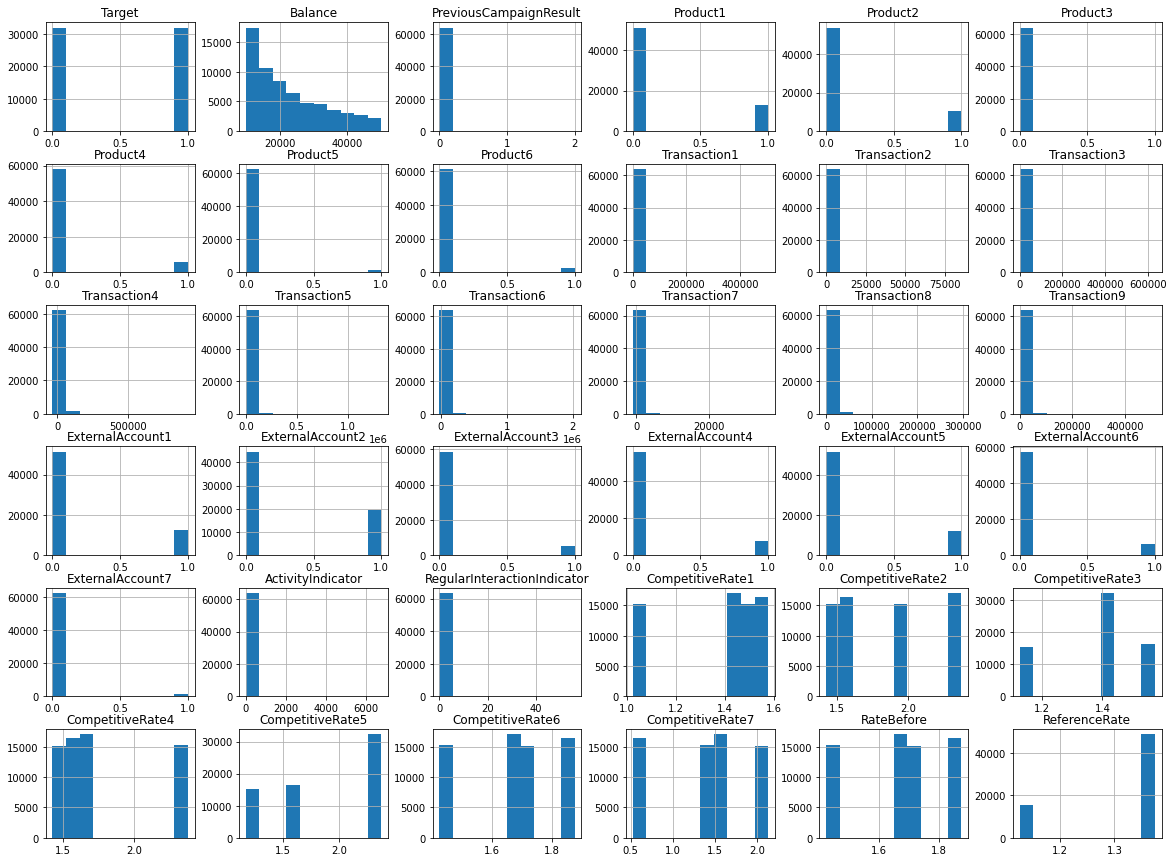

In [ ]:
data.hist(bins=10, figsize=(20,15)) #plotting a histogram to make better sense of the data
plt.show()

In [ ]:
corr_matrix = data.corr() # auto correlation of data
corr_matrix

,Target,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,Transaction1,Transaction2,Transaction3,Transaction4,Transaction5,Transaction6,Transaction7,Transaction8,Transaction9,ExternalAccount1,ExternalAccount2,ExternalAccount3,ExternalAccount4,ExternalAccount5,ExternalAccount6,ExternalAccount7,ActivityIndicator,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
Target,1.000000,-0.074225,0.002800,-0.048796,0.105820,0.013046,0.030936,0.030449,0.025681,0.025950,0.044000,0.059073,0.167652,0.086952,0.055174,0.034107,0.069925,0.042123,-0.001033,0.015137,-0.004407,0.009470,0.026847,-0.000940,0.021409,0.060437,0.038293,0.005213,0.002526,0.004889,-0.005453,0.006327,0.004179,0.000922,0.004179,0.006267
Balance,-0.074225,1.000000,0.013843,0.042026,-0.029541,-0.009774,0.002849,-0.011407,-0.015384,0.009390,-0.011237,-0.016434,0.115774,0.027401,0.050999,-0.021798,-0.006854,0.010658,0.000987,0.021924,-0.000683,0.010642,0.011657,-0.028306,-0.001731,-0.020661,-0.044323,0.002660,-0.005430,0.002633,-0.002511,-0.000840,0.003279,-0.001583,0.003279,0.001540
PreviousCampaignResult,0.002800,0.013843,1.000000,-0.006993,0.048480,-0.001588,0.004460,0.005130,0.000043,0.010857,0.012487,0.031333,0.061731,0.072331,0.037679,0.000673,0.029802,0.011044,0.004280,0.012400,0.000230,-0.002124,0.016935,-0.007328,0.000477,0.045644,0.006992,0.004624,-0.004336,0.005544,-0.002470,-0.003418,0.006124,-0.007768,0.006124,0.002530
Product1,-0.048796,0.042026,-0.006993,1.000000,-0.018538,0.027287,0.098749,-0.002076,0.006980,-0.010866,-0.014027,-0.017846,-0.013297,-0.015593,0.170571,-0.025189,-0.016882,-0.011570,-0.012811,-0.002373,-0.002373,-0.003661,-0.004779,0.044252,0.008013,-0.011086,0.011065,0.003556,0.000134,0.003178,-0.004027,0.004245,0.002893,0.001305,0.002893,0.004131
Product2,0.105820,-0.029541,0.048480,-0.018538,1.000000,0.036372,0.123285,0.058405,0.040165,0.144105,0.228269,0.376815,0.226604,0.213013,0.253103,0.255715,0.414971,0.203950,-0.006994,0.004792,0.019567,0.015495,0.043437,0.024469,0.025885,0.207185,0.126877,0.007823,0.000912,0.007534,-0.007797,0.007101,0.006929,-0.000344,0.006929,0.008513
Product3,0.013046,-0.009774,-0.001588,0.027287,0.036372,1.000000,0.045790,0.039219,0.028369,0.004065,0.012733,0.028386,0.025677,0.014310,0.022319,0.012603,0.017186,0.009508,0.003495,0.006392,-0.004499,0.005665,0.000302,-0.000431,0.002211,0.015680,0.080585,0.001019,0.001567,0.001391,-0.000211,-0.000271,0.001187,-0.002302,0.001187,0.000888
Product4,0.030936,0.002849,0.004460,0.098749,0.123285,0.045790,1.000000,0.045725,0.051246,0.020617,0.036731,0.071006,0.076325,0.093190,0.074362,0.031663,0.098712,0.023346,0.006233,0.008982,-0.003882,0.011634,0.035312,-0.021082,0.038897,0.081233,0.120897,-0.000297,0.002694,0.000581,0.001997,-0.002967,0.000386,-0.004819,0.000386,-0.000862
Product5,0.030449,-0.011407,0.005130,-0.002076,0.058405,0.039219,0.045725,1.000000,0.065074,0.033464,0.045517,0.062823,0.063088,0.053837,0.029786,0.046677,0.097778,0.027152,0.001068,0.000577,-0.004967,-0.006863,0.019241,-0.009967,0.018257,0.038668,0.057660,-0.002423,0.004609,-0.002492,0.002104,0.001033,-0.003051,0.001954,-0.003051,-0.001354
Product6,0.025681,-0.015384,0.000043,0.006980,0.040165,0.028369,0.051246,0.065074,1.000000,0.019568,0.017898,0.029285,0.058199,0.027060,0.029174,0.023799,0.033417,0.007148,0.010188,0.011704,0.017523,0.008826,0.009471,-0.026508,0.030179,0.023141,0.115848,0.001458,0.000381,0.001425,-0.001413,0.001333,0.001286,-0.000154,0.001286,0.001606
Transaction1,0.025950,0.009390,0.010857,-0.010866,0.144105,0.004065,0.020617,0.033464,0.019568,1.000000,0.145470,0.188005,0.054936,0.086106,0.274253,0.151907,0.115334,0.151576,-0.003884,-0.005904,0.001592,0.000715,0.012601,0.000126,0.012285,0.035953,0.029357,0.000120,0.001949,-0.000213,-0.000763,0.002639,-0.000572,0.002355,-0.000572,0.000986


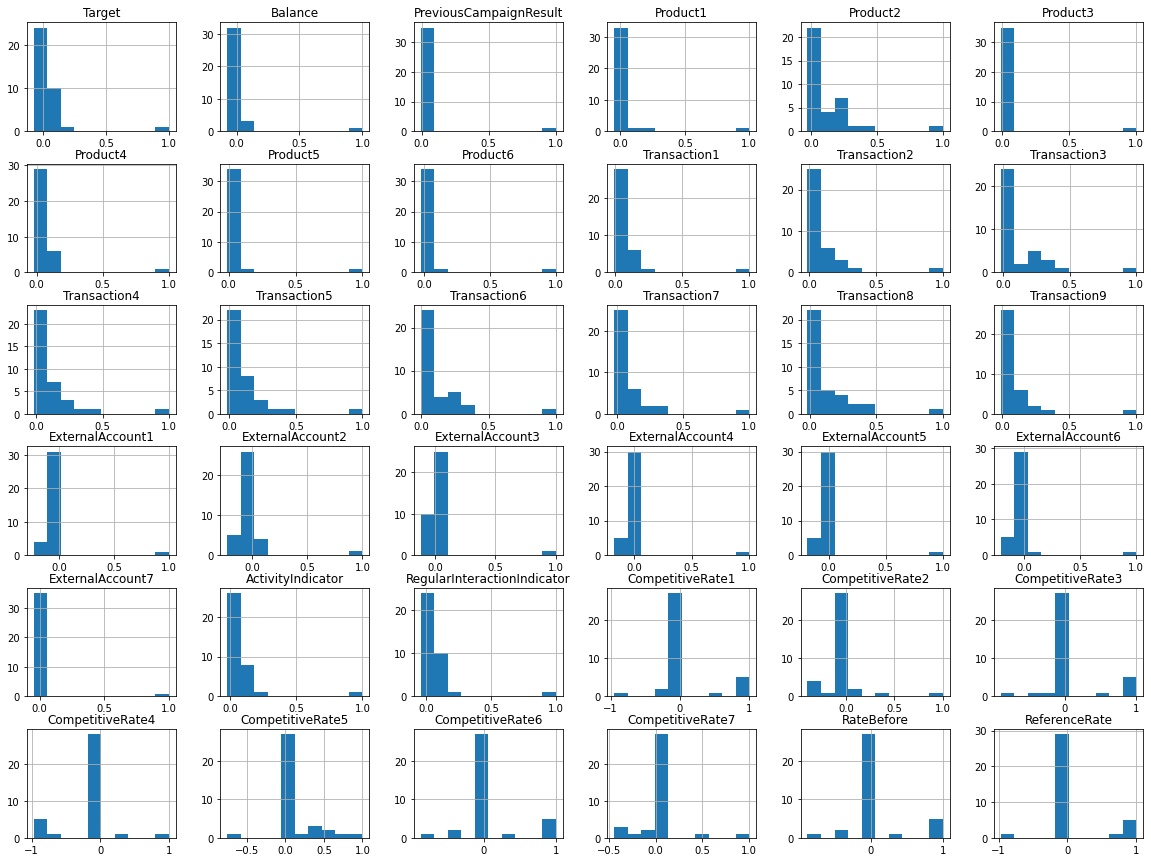

In [ ]:
corr_matrix.hist(bins=10, figsize=(20,15)) 
plt.show()

In [ ]:
df=data
target_1 = df[df["Target"] >0] # splitting data for target =1

In [ ]:
target_1.describe()

,Target,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,Transaction1,Transaction2,Transaction3,Transaction4,Transaction5,Transaction6,Transaction7,Transaction8,Transaction9,ExternalAccount1,ExternalAccount2,ExternalAccount3,ExternalAccount4,ExternalAccount5,ExternalAccount6,ExternalAccount7,ActivityIndicator,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
count,31985.0,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000,3.198500e+04,3.198500e+04,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000,31985.000000
mean,1.0,21893.581967,0.001594,0.180897,0.199312,0.002314,0.101110,0.026606,0.047022,440.896756,137.805585,1321.307830,17547.636114,7.808930e+03,1.051645e+04,131.727279,2040.768880,1527.007584,0.196623,0.308864,0.081319,0.126903,0.202439,0.100141,0.022260,26.115085,0.639831,1.380812,1.837370,1.392561,1.755372,1.886021,1.679105,1.412763,1.679105,1.315894
std,0.0,10567.514914,0.041438,0.384939,0.399489,0.048045,0.301479,0.160932,0.211689,5760.217229,1178.523148,6308.643744,29700.993282,2.623888e+04,3.393643e+04,1026.486167,8920.652101,11020.026308,0.397451,0.462032,0.273329,0.332870,0.401824,0.300192,0.147532,125.152462,1.276971,0.205534,0.371108,0.161245,0.356124,0.515339,0.160058,0.575236,0.160058,0.106223
min,1.0,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-33813.000000,0.000000e+00,-2.000000e+04,-957.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.025000,1.425000,1.125000,1.425000,1.175000,1.425000,0.525000,1.425000,1.125000
25%,1.0,13090.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,650.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.425000,1.575000,1.425000,1.575000,1.575000,1.675000,0.525000,1.675000,1.375000
50%,1.0,18848.690000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9887.080000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.425000,1.925000,1.425000,1.675000,2.375000,1.675000,1.575000,1.675000,1.375000
75%,1.0,28578.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23315.000000,5.000000e+03,7.373000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,1.000000,1.575000,2.375000,1.575000,1.675000,2.375000,1.875000,1.575000,1.875000,1.375000
max,1.0,50000.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,505000.000000,85500.000000,264065.570000,917005.000000,1.330000e+06,2.029492e+06,33219.970000,297055.190000,504848.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6762.000000,56.000000,1.575000,2.375000,1.575000,2.375000,2.375000,1.875000,2.125000,1.875000,1.375000


In [ ]:
target_0 = df[df["Target"] <1] #splitting data for target =0

In [ ]:
target_0.describe() #we can conclude tha the datasets is balanced

,Target,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,Transaction1,Transaction2,Transaction3,Transaction4,Transaction5,Transaction6,Transaction7,Transaction8,Transaction9,ExternalAccount1,ExternalAccount2,ExternalAccount3,ExternalAccount4,ExternalAccount5,ExternalAccount6,ExternalAccount7,ActivityIndicator,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
count,32014.0,32014.000000,32014.000000,32014.000000,32014.000000,32014.000000,32014.000000,32014.000000,32014.000000,32014.000000,32014.000000,32014.000000,32014.000000,32014.00000,3.201400e+04,32014.000000,32014.000000,32014.000000,32014.000000,32014.000000,32014.000000,32014.000000,32014.000000,32014.000000,32014.000000,32014.000000,32014.00000,32014.000000,32014.000000,32014.000000,32014.000000,32014.000000,32014.000000,32014.000000,32014.000000,32014.000000
mean,0.0,23499.718677,0.001374,0.219966,0.121634,0.001218,0.083214,0.017649,0.036734,184.924114,58.843316,623.886409,9149.581800,3937.80471,7.149034e+03,70.684046,1004.411235,720.723118,0.197445,0.294965,0.083745,0.120666,0.181296,0.100706,0.016368,13.444212,0.55079,1.378661,1.835500,1.390979,1.759271,1.879492,1.677763,1.411703,1.677763,1.314558
std,0.0,11007.261075,0.037048,0.414230,0.326868,0.034882,0.276209,0.131672,0.188111,3930.190102,467.764330,5445.851039,18370.622455,17183.45580,2.655994e+04,739.130901,5453.582674,7839.703105,0.398077,0.456034,0.277009,0.325744,0.385269,0.300944,0.126887,78.985948,1.03400,0.207139,0.369138,0.162416,0.358832,0.516658,0.161140,0.574939,0.161140,0.107040
min,0.0,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.340000,-5500.000000,0.00000,-2.092436e+04,-11.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.025000,1.425000,1.125000,1.425000,1.175000,1.425000,0.525000,1.425000,1.125000
25%,0.0,14021.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.425000,1.575000,1.425000,1.575000,1.575000,1.675000,0.525000,1.675000,1.375000
50%,0.0,20724.155000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3000.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.00000,1.425000,1.925000,1.425000,1.675000,2.375000,1.675000,1.575000,1.675000,1.375000
75%,0.0,31258.405000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11649.720000,2.12500,5.000000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.00000,1.575000,2.375000,1.575000,1.675000,2.375000,1.875000,1.575000,1.875000,1.375000
max,0.0,50000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,451718.750000,22212.000000,633506.040000,825000.000000,1000000.00000,1.122303e+06,36186.980000,206315.750000,513627.920000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3492.000000,26.00000,1.575000,2.375000,1.575000,2.375000,2.375000,1.875000,2.125000,1.875000,1.375000


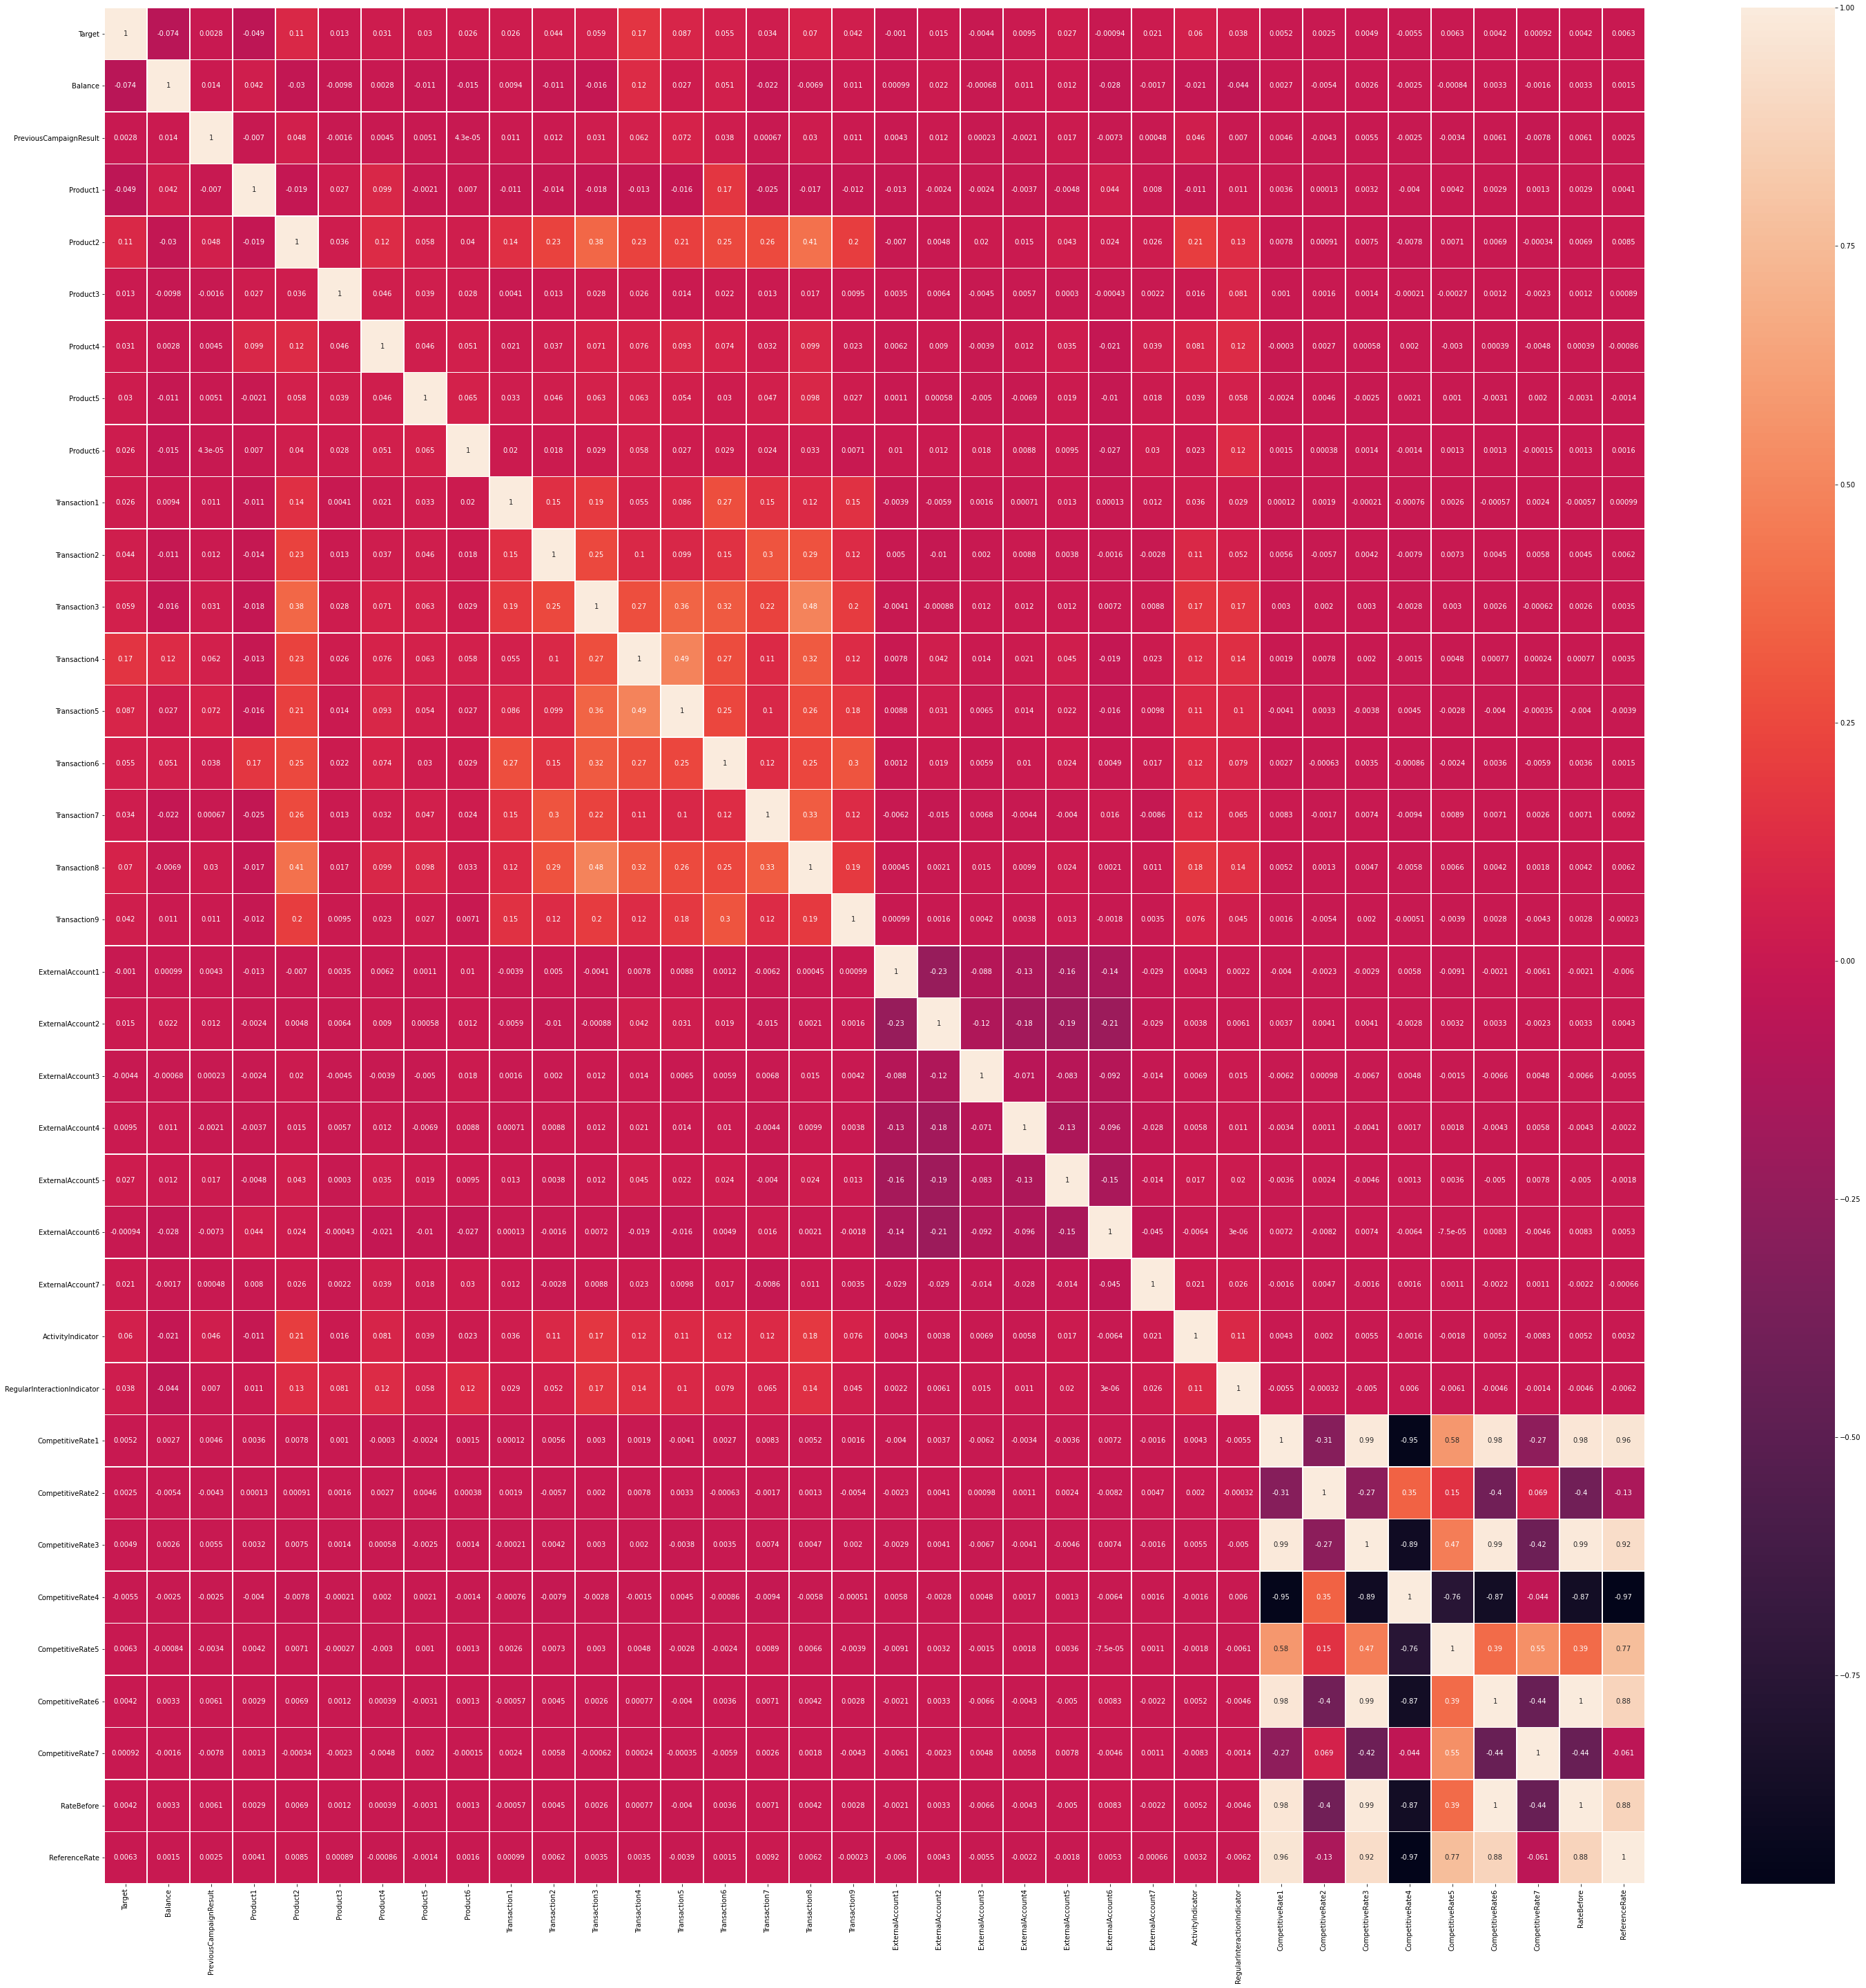

In [ ]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(), annot=True, linewidth = .5) 

#most of the attributes have no correlation with each other and are closer to 0, 
#he columns at the bottom right of the heat map seem to have significant activity. 

In [ ]:
#Correlation with output variable
cor_target = abs(corr_matrix["Target"])
#Selecting correlated features with at least 0.25 
relevant_features = cor_target[cor_target>0.25]

In [ ]:
relevant_features

Target    1.0
Name: Target, dtype: float64

In [ ]:
'''
high_corr = data.corr()[abs(data.corr())>.1]
plt.figure(figsize=(50,50))
sns.heatmap(high_corr, annot=True, linewidth = .5)
'''

'\nhigh_corr = data.corr()[abs(data.corr())>.1]\nplt.figure(figsize=(50,50))\nsns.heatmap(high_corr, annot=True, linewidth = .5)\n'

## Conclusions form the data description and exploration:
 1: minimum balance of customers in these accounts in 10,000 dollars
 
 2: The column CompetitiveRate6 is the same as the column RateBefore
 
 3: There are 31983 customers with target 1 and 32014 customers who are not targets(target0) so, the dataset is fairly balanced. 
 
 4: The Customers with product 2 and transaction 4 were more likely to be targets than other customers

 5: There is no strong correlation of the Target with any other attributes.

 6: We see high intercorrelation between attributes, specifically Rate fields and Transaction fields
 

# Data Preparation

## Dropping outliers

At first we considered dropping 2 outliers (PreviousCampaignResult = 2), however as we will see below, we actually drop this feature, because it has no importance in any of the models

In [ ]:
#df = data[data.PreviousCampaignResult != 2] #dropping outlier from PreviousCampaignResult

# Feature Engineering

Each customer can have upto 6 Products from the bank and 7 external accounts, the nature of the products and external accounts is not known and are a binary value, 
we sumed the number of products each customer has from 1 to 6, 
sumed the number of external accounts each customer has from 1 to 7, 
also the customer can have upto 9 transactions - we counted the number of transactions the customer has had from 1-9

In [ ]:
#create a copy of the original dataframe to avoid loading new data every time
df_new = data.copy()

In [ ]:
trans_cnt = df_new.loc[:,'Transaction1':'Transaction9'].astype(bool).sum(axis=1) # total number of transactions
trans_amt = df_new.loc[:,'Transaction1':'Transaction9'].sum(axis=1) # total transaction amount
#rate_dif = df_new.loc[:,'ReferenceRate'] - df_new.loc[:,'RateBefore']
#ext_acct_cnt = df_new.loc[:,'ExternalAccount1':'ExternalAccount7'].astype(bool).sum(axis=1) #total number of external accounts
#prd_cnt = df_new.loc[:,'Product1':'Product6'].astype(bool).sum(axis=1) #total number of external

#df_new['ProductCount'] = prd_cnt
#df_new['RateDifference'] = rate_dif
df_new["Transaction_Count"] = trans_cnt
df_new["Transaction_Amount"] = trans_amt
#df_new["External_Account"] = ext_acct_cnt

#df_new.head()

We ran multiple models with all the features, and when we performed feature_importance analysis, we realized the following have a cumulative importance of <1% (Refer to the Appendix 1 for the justification)

In [ ]:
#df_new.drop(df_new.loc[:, 'Transaction1':'Transaction3'], inplace=True, axis=1) #dropping irrelevant transactions
#df_new.drop(df_new.loc[:, 'Transaction7':'Transaction8'], inplace=True, axis=1) #dropping irrelevant transactions
df_new.drop(df_new.loc[:, 'ExternalAccount1':'ExternalAccount7'], inplace=True, axis=1) #dropping external accounts
df_new.drop(df_new.loc[:, 'Product3':'Product3'], inplace=True, axis=1) #dropping irrelevant products
df_new.drop(df_new.loc[:, 'Product5':'Product6'], inplace=True, axis=1) #dropping irrelevant products
df_new.drop(df_new.loc[:, 'CompetitiveRate1':'ReferenceRate'], inplace=True, axis=1) #dropping rates
df_new.drop(df_new.loc[:, ['PreviousCampaignResult']], inplace=True, axis=1) #Previous Campaign is also irrelevant

In [ ]:
df_new.shape #we now have only 16 features instead of 36 + an index

(63999, 18)

Additional feature engineering involving activity, but it didn't end up in the final model

In [ ]:
#df_new['activeBalance'] = df_new['ActivityIndicator'] / df_new['RegularInteractionIndicator']

In [ ]:
#df_new['activeBalance'].replace([np.inf, -np.inf], 99, inplace=True)

In [ ]:
#df_new['activeBalance'] = np.where(df_new['activeBalance'] == 99, df_new['ActivityIndicator'], df_new['activeBalance'])

In [ ]:
#df_new['activeBalance'].fillna(0, inplace=True)

### Model Building

In [ ]:
#Create a function that will split the dataframe and return scaled X and y train/test datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def split_scale(datafr, test_size_perc=0.3):
  y = datafr.Target #Target is the label
  X = datafr.drop('Target', axis=1) #Everything else is the feature
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_perc, random_state=42)
  global scaler
  scaler = StandardScaler() #Call Scaler
  scaler.fit(X_train)
  X_train_ss =  pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
  X_test_ss = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
  return X_train_ss, y_train, X_test_ss, y_test

In [ ]:
X_train_ss, y_train, X_test_ss, y_test = split_scale(df_new)

We also tried PCA, however it hurt our models, so we did not use it in the final model

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.99)
pca.fit(X_train_ss)

X_train_ss = pca.transform(X_train_ss)
X_test_ss = pca.transform(X_test_ss)

Check what our data looks like:

In [ ]:
X_train_ss.head()

,Balance,Product1,Product2,Product4,Transaction4,Transaction5,Transaction6,Transaction9,ActivityIndicator,RegularInteractionIndicator,Transaction_Count,Transaction_Amount
Customer_id,,,,,,,,,,,,
CTSP009657,-1.126234,-0.502970,-0.435825,-0.318331,0.105702,-0.265477,-0.291469,-0.118284,-0.165045,0.351125,-0.450888,-0.235657
CTSP060363,1.651864,-0.502970,-0.435825,-0.318331,-0.534705,-0.260500,-0.291469,-0.118284,-0.183314,0.351125,-0.450888,-0.465398
CTSP031406,1.396886,-0.502970,-0.435825,-0.318331,-0.081857,-0.265477,-0.291469,-0.118284,-0.165045,-0.510229,-0.450888,-0.303408
CTSP058088,-0.665179,-0.502970,-0.435825,-0.318331,-0.534705,-0.265477,-0.291469,-0.118284,-0.183314,-0.510229,-1.009684,-0.466989
CTSP044345,0.089762,1.988191,-0.435825,-0.318331,-0.134451,-0.265477,1.969423,-0.118284,0.017645,-0.510229,0.107907,0.675815


We first try **Logistic Regression** to set a benchmark


In [ ]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(random_state=42)
logisticRegr.fit(X_train_ss, y_train)

score_train = logisticRegr.score(X_train_ss, y_train)
score_test = logisticRegr.score(X_test_ss, y_test)
print('Train Score: ', score_train)
print('Test Score:', score_test)

Train Score:  0.6186522020580817
Test Score: 0.615625


Not too bad of a start (as we see later, this score doesn't improve considerably)

We try **SVC** now

In [ ]:
from sklearn.svm import SVC

linSVC = SVC(random_state=42)
linSVC.fit(X_train_ss, y_train)

score_train = linSVC.score(X_train_ss, y_train)
score_test = linSVC.score(X_test_ss, y_test)
print('Train Score: ', score_train)
print('Test Score:', score_test)

Train Score:  0.6337195026674702
Test Score: 0.6191145833333334


Very similar to the Logistic Regression

Now we try **RandomForestClassifier** and do a 3-fold cross validation RandomSearch to tune the hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Tune the following hyperparameters
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=20)]
max_depth = [int(x) for x in np.linspace(2, 50, num = 11)]
min_samples_split = [2,5,10,20,25]
min_samples_leaf = [1,2,4,5,7,10]

#Create the grid with the above hyperparameters
random_grid = {'n_estimators':n_estimators,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}

In [ ]:
#Running takes hours to finish
rnd_clf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rnd_clf, param_distributions=random_grid, n_iter=100, cv=3, n_jobs=-1)
rf_random.fit(X_train_ss, y_train)

In [ ]:
score_train = rf_random.score(X_train_ss, y_train)
score_test = rf_random.score(X_test_ss, y_test)
print('Train Score: ', score_train)
print('Test Score:', score_test)

In [ ]:
#Show the best hyperparameters
rf_random.best_params_

The random forest is overfitting - we can decrease the number of estimators and max_depth while increasing the min_samples_leaf. The following parameters are the optimal results from above (the GridSearch takes hours on Google Colab, so here's our result from a prior run)

In [ ]:
rnd_clf_custom = RandomForestClassifier(n_estimators=100, min_samples_split=50, min_samples_leaf=7, max_depth=20, n_jobs=-1)
rnd_clf_custom.fit(X_train_ss, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
score_train = rnd_clf_custom.score(X_train_ss, y_train)
score_test = rnd_clf_custom.score(X_test_ss, y_test)
print('Train Score: ', score_train)
print('Test Score:', score_test)

Train Score:  0.7067122033973973
Test Score: 0.6267708333333334


In [ ]:
#Show the feature importances to find if any of the features is an outlier
rnd_clf_custom.feature_importances_

array([0.18929105, 0.01767668, 0.00934886, 0.00831606, 0.00388842,
       0.00749587, 0.01035587, 0.21422019, 0.05970213, 0.06791711,
       0.00597141, 0.0122072 , 0.01830516, 0.1298562 , 0.02485712,
       0.02554868, 0.19504199])

We see all the features have relatively high importance

Let's see if we can improve on the accuracy and overfitting using a **Gradient Boosting Classifier**. We perform another 3 fold cross validation Random Search to tune the hyperparameters. Note that google colab couldn't handle the random search below, so the result is derived from a Jupyter notebook code (Please skip to the custom parameters below)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#For illustation only, running GridSearch on Colab wasn't very fast
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=20)]
max_depth = [int(x) for x in np.linspace(2, 50, num = 11)]
min_samples_split = [2,5,10,20,25]
min_samples_leaf = [1,2,4,5,7,10]
learning_rate = [0.05,0.07,0.1,0.13,0.15,0.2,0.25,0.5,1]
random_grid_gbrt = {'n_estimators':n_estimators,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'learning_rate':learning_rate}

In [ ]:
#Run if you have days to wait or switch to the Jupyter Notebook :)
gbrt = GradientBoostingClassifier()
gbc_random = RandomizedSearchCV(estimator=gbrt, param_distributions=random_grid_gbrt, n_iter=100, cv=3, n_jobs=-1)
gbc_random.fit(X_train_ss, y_train)

In [ ]:
#Show the scores
score_train = gbc_random.score(X_train_ss, y_train)
score_test = gbc_random.score(X_test_ss, y_test)
print('Train Score: ', score_train)
print('Test Score:', score_test)

In [ ]:
#Show the best hyperparameters
gbc_random.best_params_

In [ ]:
#Show the feature importances to find if any of the features is an outlier
gbrt.feature_importances_

The following is the result we got by running the search algorithm in Jupyter notebook, as the code didn't finish running in Google Colab.

In [ ]:
gbrt_custom = GradientBoostingClassifier(max_depth=2, n_estimators=200, learning_rate=0.25,
                                 min_samples_split=5, min_samples_leaf=5)
gbrt_custom.fit(X_train_ss, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.25, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
score_train = gbrt_custom.score(X_train_ss, y_train)
score_test = gbrt_custom.score(X_test_ss, y_test)
print('Train Score: ', score_train)
print('Test Score:', score_test)

Train Score:  0.64351882854528
Test Score: 0.62796875


We also explored XGBoost - the fastest converging algorithm, and it has the best score!

In [ ]:
import xgboost

xgb_clf = xgboost.XGBClassifier()
xgb_clf.fit(X_train_ss, y_train, eval_set=[(X_test_ss, y_test)], early_stopping_rounds=20)

[0]	validation_0-error:0.393021
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.382344
[2]	validation_0-error:0.389792
[3]	validation_0-error:0.384583
[4]	validation_0-error:0.384844
[5]	validation_0-error:0.384479
[6]	validation_0-error:0.384219
[7]	validation_0-error:0.383906
[8]	validation_0-error:0.383385
[9]	validation_0-error:0.383542
[10]	validation_0-error:0.38276
[11]	validation_0-error:0.382969
[12]	validation_0-error:0.382083
[13]	validation_0-error:0.381771
[14]	validation_0-error:0.382031
[15]	validation_0-error:0.381563
[16]	validation_0-error:0.380937
[17]	validation_0-error:0.379583
[18]	validation_0-error:0.38
[19]	validation_0-error:0.379219
[20]	validation_0-error:0.378906
[21]	validation_0-error:0.378177
[22]	validation_0-error:0.377708
[23]	validation_0-error:0.378021
[24]	validation_0-error:0.377917
[25]	validation_0-error:0.378385
[26]	validation_0-error:0.378021
[27]	validation_0-error:0.37724
[28]	validation_0-error:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#Show the scores
score_train = xgb_clf.score(X_train_ss, y_train)
score_test = xgb_clf.score(X_test_ss, y_test)
print('Train Score: ', score_train)
print('Test Score:', score_test)

Train Score:  0.6372240451795799
Test Score: 0.6294270833333333


Generate a feature importance plot

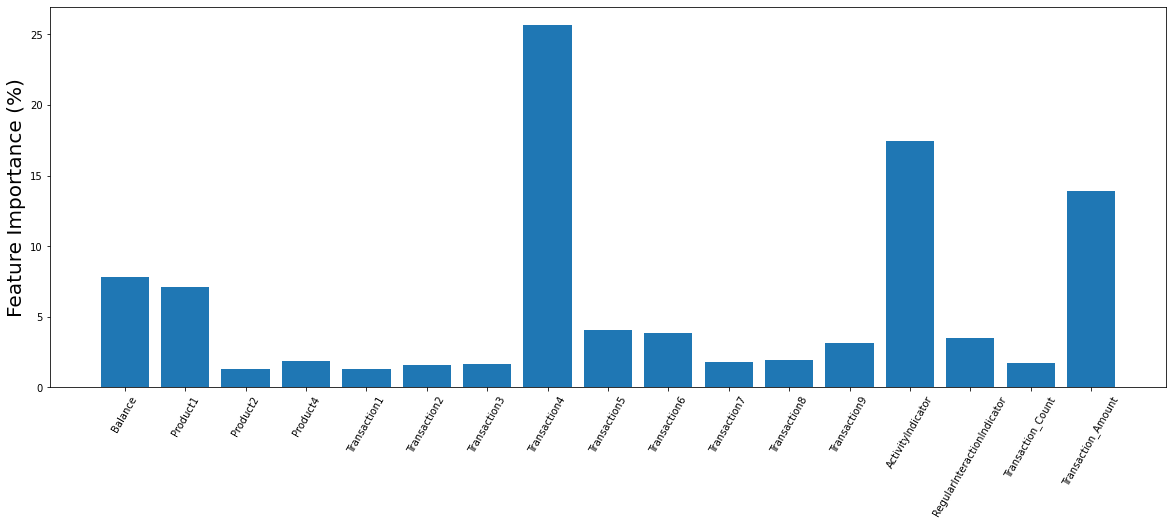

In [ ]:
feature_imp = xgb_clf.feature_importances_ * 100 #pd.DataFrame(xgb_clf.feature_importances_,index=X_train_ss.columns)
x = np.arange(17)
f, ax = plt.subplots(figsize=(20,7))
plt.bar(x, feature_imp)
plt.xticks(x, X_train_ss.columns.tolist(),rotation=60)
plt.ylabel('Feature Importance (%)', fontsize=20)
plt.show()

Let's combine everything we have so far and try Voting now 

In [ ]:
from sklearn.ensemble import VotingClassifier

#Add SVC, XGBoost, RandomForest and GradientBoosting Classifiers
voting_clf = VotingClassifier(estimators=[('rndfr', rnd_clf_custom), ('gbct', gbrt_custom), ('linsvc', linSVC), ('xgb', xgb_clf)], voting='hard')
voting_clf.fit(X_train_ss, y_train)

score_train = voting_clf.score(X_train_ss, y_train)
score_test = voting_clf.score(X_test_ss, y_test)
print('Train Score: ', score_train)
print('Test Score:', score_test)

Train Score:  0.6572021696912878
Test Score: 0.62796875


Although a similar score, voting has been very impressive. Ultimately, Kaggle liked our XGBoost and GradientBoostingClassifiers better, plus they are faster

We see that all ensemble methods (RandomForest, GradientBoosting, XGBoost, Voting) have very similar results. XGBoost was very fast compared to others, and hence it was preferred (even after we performed hyperparameter tuning), we conclude that it's a very powerful model.

In conclusion, our dataset was balanced, and even the fanciest models were around 63% accuracy. This demonstrates the challenges around real world data, we struggle to improve the model even by 0.1%. And even if we achieve this, the effort to do so grows exponentially.

The feature engineering is very important, to improve the accuracy and the speed of the model.

We can't always rely on black-box tools. Although XGBoost was very useful, PCA actually hurt our model.

We also tried Neural Networks, which we decided not to include here because of their abysmal performance (<50% accuracy). This might have been due to our lack of enough experience, and that they are much more challenging to implement.

Finally, we wish we had more business insight to drive some of the decisions. This could have definitely improved our results, and made our decision making more justifiable and rational.

### Export the Model

Load test.csv Dataset to apply the model:

In [ ]:
uploaded = files.upload()
data_test_raw = pd.read_csv(io.BytesIO(uploaded['test.csv']), index_col="Customer_id")

Saving test.csv to test (2).csv


Preprocessing: define a feature engineering to put the data in the right format

In [ ]:
def feature_eng(df):
  #Add new features
  df_test = df.copy()
  df_test["Transaction_Count"] = df_test.loc[:,'Transaction1':'Transaction9'].astype(bool).sum(axis=1)
  df_test["Transaction_Amount"] = df_test.loc[:,'Transaction1':'Transaction9'].sum(axis=1)
  #Drop irrelevant features
  df_test.drop(df_test.loc[:, 'ExternalAccount1':'ExternalAccount7'], inplace=True, axis=1) #dropping external accounts
  df_test.drop(df_test.loc[:, 'Product3':'Product3'], inplace=True, axis=1) #dropping irrelevant products
  df_test.drop(df_test.loc[:, 'Product5':'Product6'], inplace=True, axis=1) #dropping irrelevant products
  df_test.drop(df_test.loc[:, 'CompetitiveRate1':'ReferenceRate'], inplace=True, axis=1) #dropping rates
  df_test.drop(df_test.loc[:, ['PreviousCampaignResult']], inplace=True, axis=1) #Previous Campaign is also irrelevant
  return df_test

Apply above to our test.csv file

In [ ]:
# Save data to a dataframe after performing feature engineering and scaling
data_test = feature_eng(data_test_raw)
data_test =  pd.DataFrame(scaler.transform(data_test),
                          index=data_test.index, columns=data_test.columns)

In [ ]:
#Predict and save it to a dataframe
result_predict = pd.DataFrame(xgb_clf.predict(data_test), index=data_test.index, columns = ["Target"])

In [ ]:
result_predict.head()

,Target
Customer_id,
CTSP063999,0
CTSP064000,0
CTSP064001,0
CTSP064002,0
CTSP064003,1


In [ ]:
# Export Prediciton DataFrame
from google.colab import drive
drive.mount('drive')

result_predict.to_csv('xgb_result.csv')
!cp xgb_result.csv "drive/My Drive/"

### Appendix1: Feature engineering justifications

Because the XGBoost has the fastest runtime, we tested different scenarios with XGBoost

In [ ]:
df_test = data.copy()

trans_cnt = df_test.loc[:,'Transaction1':'Transaction9'].astype(bool).sum(axis=1) # total number of transactions
trans_amt = df_test.loc[:,'Transaction1':'Transaction9'].sum(axis=1) # total transaction amount
rate_dif = df_test.loc[:,'ReferenceRate'] - df_test.loc[:,'RateBefore']
ext_acct_cnt = df_test.loc[:,'ExternalAccount1':'ExternalAccount7'].astype(bool).sum(axis=1) #total number of external accounts
prd_cnt = df_test.loc[:,'Product1':'Product6'].astype(bool).sum(axis=1) #total number of external

df_test['ProductCount'] = prd_cnt
df_test['RateDifference'] = rate_dif
df_test["Transaction_Count"] = trans_cnt
df_test["Transaction_Amount"] = trans_amt
df_test["External_Account"] = ext_acct_cnt

In [ ]:
X_train_t_ss, y_train_t, X_test_t_ss, y_test_t = split_scale(df_test)

In [ ]:
import xgboost

xgb_clf_t = xgboost.XGBClassifier()
xgb_clf_t.fit(X_train_t_ss, y_train_t, eval_set=[(X_test_t_ss, y_test_t)], early_stopping_rounds=20)

In [ ]:
#Show the scores
score_train = xgb_clf_t.score(X_train_t_ss, y_train_t)
score_test = xgb_clf_t.score(X_test_t_ss, y_test_t)
print('Train Score: ', score_train)
print('Test Score:', score_test)

Let's see the feature importances, and start eliminating these "low importance" features to see if the model improves (Features that have <2% relevance)

In [ ]:
feature_import = pd.DataFrame(xgb_clf_t.feature_importances_, index=X_train_t_ss.columns)

In [ ]:
feature_import[feature_import[0]<0.02]

Drop the above features:

In [ ]:
df_test.drop(df_test.loc[:, ['PreviousCampaignResult']], inplace=True, axis=1) #Previous Campaign is irrelevant
df_test.drop(df_test.loc[:, 'Transaction1':'Transaction3'], inplace=True, axis=1) #dropping irrelevant transactions
df_test.drop(df_test.loc[:, 'Transaction7':'Transaction8'], inplace=True, axis=1) #dropping irrelevant transactions
df_test.drop(df_test.loc[:, 'ExternalAccount1':'ExternalAccount7'], inplace=True, axis=1) #dropping external accounts
df_test.drop(df_test.loc[:, 'Product2':'Product3'], inplace=True, axis=1) #dropping irrelevant products
df_test.drop(df_test.loc[:, 'Product5':'Product6'], inplace=True, axis=1) #dropping irrelevant products
df_test.drop(df_test.loc[:, 'CompetitiveRate1':'ReferenceRate'], inplace=True, axis=1) #dropping rates
df_test.drop(df_test.loc[:, ['ProductCount']], inplace=True, axis=1) #dropping irrelevant added features
df_test.drop(df_test.loc[:, ['RateDifference']], inplace=True, axis=1) #dropping irrelevant added features
df_test.drop(df_test.loc[:, ['External_Account']], inplace=True, axis=1) #dropping irrelevant added features

In [ ]:
X_train_t_ss, y_train_t, X_test_t_ss, y_test_t = split_scale(df_test)

In [ ]:
X_train_t_ss.head()

In [ ]:
xgb_clf_t = xgboost.XGBClassifier()
xgb_clf_t.fit(X_train_t_ss, y_train_t, eval_set=[(X_test_t_ss, y_test_t)], early_stopping_rounds=20)
score_train = xgb_clf_t.score(X_train_t_ss, y_train_t)
score_test = xgb_clf_t.score(X_test_t_ss, y_test_t)
print('Train Score: ', score_train)
print('Test Score:', score_test)

Not a significant improvement, but it means we can safely drop these features without decreasing the score! But can we drop anything else?

In [ ]:
feature_import = pd.DataFrame(xgb_clf_t.feature_importances_, index=X_train_t_ss.columns)
print(feature_import)

In [ ]:
df_test.drop(df_test.loc[:, ['Product4']], inplace=True, axis=1) #dropping irrelevant added features
df_test.drop(df_test.loc[:, ['Transaction_Count']], inplace=True, axis=1) #dropping irrelevant added features

#Call train_test split + scale function
X_train_t_ss, y_train_t, X_test_t_ss, y_test_t = split_scale(df_test)

xgb_clf_t = xgboost.XGBClassifier()
xgb_clf_t.fit(X_train_t_ss, y_train_t, eval_set=[(X_test_t_ss, y_test_t)], early_stopping_rounds=20)
score_train = xgb_clf_t.score(X_train_t_ss, y_train_t)
score_test = xgb_clf_t.score(X_test_t_ss, y_test_t)
print('Train Score: ', score_train)
print('Test Score:', score_test)

Very insignificant drop, but we would rather keep extra 2 features.
Ultimately, we realized it's for the best to keep all the Transactions.